In [77]:
# %load model.py
import csv
import cv2
import numpy as np
from sklearn.utils import shuffle
lines = []
with open('/home/gulshan216/Documents/SDC_Behavioral_Cloning/driving_log_track1_center_driving.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
# with open('/home/gulshan216/Documents/SDC_Behavioral_Cloning/driving_log_track1_recovery_lap.csv') as csvfile1:
# 	reader = csv.reader(csvfile1)
# 	for line in reader:
# 		lines.append(line)
# with open('/home/gulshan216/Documents/SDC_Behavioral_Cloning/driving_log_track1_additional_lap.csv') as csvfile2:
#     reader = csv.reader(csvfile2)
#     for line in reader:
#         lines.append(line)

from sklearn.model_selection import train_test_split

train_samples,validation_samples=train_test_split(lines,test_size=0.2)
print(len(train_samples))
print(len(validation_samples))
# lines=np.array(lines)
# steer_ang=np.array(lines[:,3])
# steer_ang=steer_ang.flatten()
# print(steer_ang.shape)
# # print(lines[0][3])
# images=[]
# measurements=[]
# # steer_correction=0.2
# steer_ang_steps=np.arange(0.,10.,0.2)
# steer_ang_count=[]
# for i in steer_ang_steps:
#     img = steer_ang[i<=steer_ang<(i+0.2)] 
#     steer_ang_count.append(len(img))
# print(steer_ang_count)
# for line in lines:
#     center_img_path = line[0]
#     left_img_path = line[1]
#     right_img_path = line[2]
# #     current_path = '../IMG/' + sourcepath.split('/')[-1]
#     center_img=cv2.imread(center_img_path)
#     left_img=cv2.imread(left_img_path)
#     _img=cv2.imread(right_img_path)
#     image=image[:,:,::-1]
#     center_ang = float(line[3])
#     images.append(image)
#     measurements.append(measurement)

image1 = cv2.imread("/home/gulshan216/Documents/SDC_Behavioral_Cloning/IMG_track1_w_center_recovery_lap/center_2018_01_12_23_58_13_465.jpg")
# images.append(image)
measurements.append(0.0)
image2 = cv2.imread("/home/gulshan216/Documents/SDC_Behavioral_Cloning/IMG_track1_w_center_recovery_lap/center_2018_01_12_23_58_15_509.jpg")
# images.append(image)
measurements.append(-0.508827)
image3 = cv2.imread("/home/gulshan216/Documents/SDC_Behavioral_Cloning/IMG_track1_w_center_recovery_lap/center_2018_01_12_23_58_31_876.jpg")
# images.append(image)
measurements.append(0.359026)
images.extend([image1,image2,image3])
images = np.array(images)
print(images[0].shape)
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(images[2][:,:,::-1])
plt.figure()
plt.imshow(images[0][:,:,::-1])






3836
959


AttributeError: 'numpy.ndarray' object has no attribute 'extend'

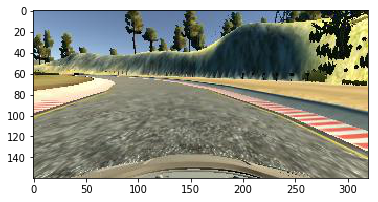

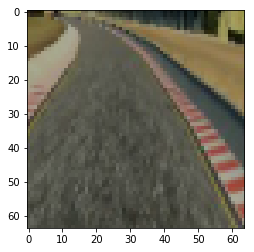

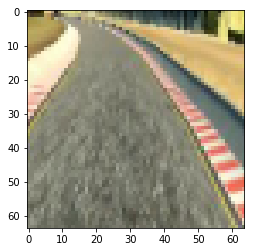

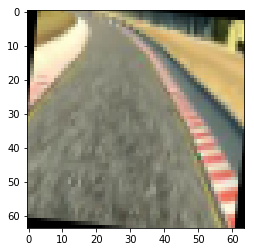

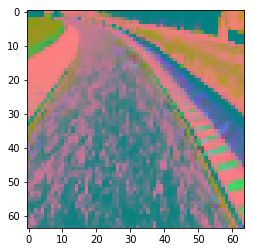

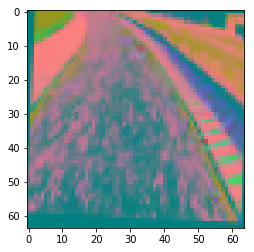

In [79]:
import random
import cv2
import numpy as np

resized_shape=(64,64)
def crop_resize_img(img):
    return cv2.resize(img[60:135], resized_shape, interpolation=cv2.INTER_AREA)

def img_brightness(img):
    if random.randint(0,1)==0:
        return img
    img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    img[:,:,2]=random.uniform(0.2, 0.9)*img[:,:,2]
    return cv2.cvtColor(img,cv2.COLOR_HSV2BGR)
    
def img_translation(img):
    if random.randint(0,1)==0:
        return img
    tx = random.randint(-4,4)
    ty = random.randint(-4,4)
    M = np.float32([[1,0,tx],[0,1,ty]])
    dst = cv2.warpAffine(img,M,resized_shape)
    return dst

def rotation(img):
    if random.randint(0,1)==0:
        return img
    degree = 40.0*np.random.rand()-20.0
    M = cv2.getRotationMatrix2D((resized_shape[0]//2,resized_shape[1]//2),degree,1.0)
    dst = cv2.warpAffine(img,M,resized_shape)
    return dst

def preprocess(img):
    img=crop_resize_img(img)
    for i in range(img.shape[2]):
        img[:,:,i] = cv2.equalizeHist(img[:,:,i])
    img=cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    return img

def augment_image(img):
    img = crop_resize_img(img)
    for i in range(img.shape[2]):
        img[:,:,i] = cv2.equalizeHist(img[:,:,i])
    img = img_brightness(img)
    img = img_translation(img)
    img = rotation(img)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    return img


image1 = cv2.imread("/home/gulshan216/Documents/SDC_Behavioral_Cloning/IMG_track1_w_center_recovery_lap/center_2018_01_12_23_58_15_509.jpg")

plt.figure()
plt.imshow(image1[:,:,::-1])
plt.figure()
plt.imshow(img_brightness(crop_resize_img(image1))[:,:,::-1])
plt.figure()
plt.imshow(img_translation(crop_resize_img(image1))[:,:,::-1])
plt.figure()
plt.imshow(rotation(crop_resize_img(image1))[:,:,::-1])
plt.figure()
plt.imshow(preprocess(image1))
plt.figure()
plt.imshow(augment_image(image1))

In [74]:
def generator(samples,batch_size=32):
	num_examples=len(samples)
	steer_correction=0.20
	while 1:
		shuffle(samples)
		for offset in range(0,num_examples,batch_size):
			X_batch=samples[offset:offset+batch_size]
			car_images=[]
			steer_ang=[]
			for row in X_batch:
				path1=row[0]
				path2=row[1]
				path3=row[2]
				center_img_path='/home/carnd/SDC_Behavioral_Cloning/IMG_track1_w_center_recovery_lap/'+path1.split('/')[-1]
				left_img_path='/home/carnd/SDC_Behavioral_Cloning/IMG_track1_w_center_recovery_lap/'+path2.split('/')[-1]
				right_img_path='/home/carnd/SDC_Behavioral_Cloning/IMG_track1_w_center_recovery_lap/'+path3.split('/')[-1]
				center_img=cv2.imread(center_img_path)
				center_img_flip=np.fliplr(center_img)
				left_img=cv2.imread(left_img_path)
				right_img=cv2.imread(right_img_path)
# 				center_img=center_img[:,:,::-1]
# 				left_img=left_img[:,:,::-1]
# 				right_img=right_img[:,:,::-1]
# 				center_img_flip=center_img_flip[:,:,::-1]
				center_ang = float(row[3])
				car_images.extend([preprocess(center_img),preprocess(left_img),preprocess(right_img),preprocess(center_img_flip)])
				steer_ang.extend([center_ang,center_ang+steer_correction,center_ang-steer_correction,-center_ang])
				car_images.extend([augment_image(center_img),augment_image(left_img),augment_image(right_img),augment_image(center_img_flip)])
				steer_ang.extend([center_ang,center_ang+steer_correction,center_ang-steer_correction,-center_ang])
				#car_images.extend(center_img,center_img_flip,left_img,right_img)
				#steer_ang.extend(center_ang,-center_ang,center_ang-steer_correction,center_ang+steer_correction)

			X_train = np.array(car_images)
			y_train = np.array(steer_ang)
			yield shuffle(X_train,y_train)

train_generator=generator(train_samples,batch_size=32)
validation_generator=generator(validation_samples,batch_size=32)

# images_new = np.array(images)
# measurements_new=np.array(measurements)
# print(images_new.shape)

from keras.models import Sequential
from keras.layers.core import Flatten,Dense,Lambda,Dropout,Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Cropping2D

model=Sequential()

model.add(Lambda(lambda x: (x/255.0) - 0.5,input_shape=(64,64,3)))
# model.add(Cropping2D(cropping=((50,20),(0,0))))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Flatten())
model.add(Dense(1164))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dropout(0.6))
model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

model.fit_generator(train_generator,samples_per_epoch=(len(train_samples)*8),validation_data=validation_generator,nb_val_samples=len(validation_samples),nb_epoch=2)

model.save('model.h5')
exit()

NameError: name 'train_samples' is not defined